Modelo de ML aplicado a series de tiempo de las acciones de Apple en bolsa

In [3]:
import warnings
warnings.filterwarnings('ignore') #evitar errores en las series de tiempo

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')
df_apple=pd.read_csv("/content/drive/MyDrive/AAPL_2006-01-01_to_2018-01-01_M30.csv", sep=',', index_col='Date', parse_dates=['Date']) #indexacion por fechas para facilitar la visualizacion
df_apple.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
2006-01-10,10.89,11.70,10.83,11.55,570088246,AAPL
2006-01-11,11.98,12.11,11.80,11.99,373548882,AAPL
2006-01-12,12.14,12.34,11.95,12.04,320201966,AAPL
2006-01-13,12.14,12.29,12.09,12.23,194153393,AAPL


In [4]:
df_apple.tail(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-15,173.63,174.17,172.46,173.97,40169307,AAPL
2017-12-18,174.88,177.20,174.86,176.42,29421114,AAPL
2017-12-19,174.99,175.39,174.09,174.54,27436447,AAPL
2017-12-20,174.87,175.42,173.25,174.35,23475649,AAPL
2017-12-21,174.17,176.02,174.10,175.01,20949896,AAPL
2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL


In [5]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [6]:
df_apple.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.0,6.467331e+01,4.452493e+01,7.39,2.342500e+01,5.786000e+01,9.916500e+01,1.751100e+02
High,3019.0,6.525683e+01,4.481177e+01,7.56,2.380500e+01,5.846000e+01,1.002750e+02,1.772000e+02
Low,3019.0,6.403344e+01,4.423083e+01,7.17,2.301500e+01,5.732000e+01,9.838500e+01,1.748600e+02
Close,3019.0,6.466289e+01,4.453645e+01,7.24,2.342000e+01,5.792000e+01,9.948000e+01,1.764200e+02
Volume,3019.0,1.311457e+08,1.018560e+08,11475922.00,5.292889e+07,1.066271e+08,1.798977e+08,8.432640e+08


In [7]:
#cambiamos el formato para mejor visualizacion
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_apple.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.00,64.67,44.52,7.39,23.43,57.86,99.16,175.11
High,3019.00,65.26,44.81,7.56,23.80,58.46,100.28,177.20
Low,3019.00,64.03,44.23,7.17,23.02,57.32,98.39,174.86
Close,3019.00,64.66,44.54,7.24,23.42,57.92,99.48,176.42
Volume,3019.00,131145687.66,101855966.22,11475922.00,52928887.00,106627080.00,179897651.50,843264044.00


In [8]:
df_apple[df_apple==0].count()/ df_apple.count() #ceros por columna

,0
Open,0.00
High,0.00
Low,0.00
Close,0.00
Volume,0.00
Name,0.00


In [9]:
df_apple.shape

(3019, 6)

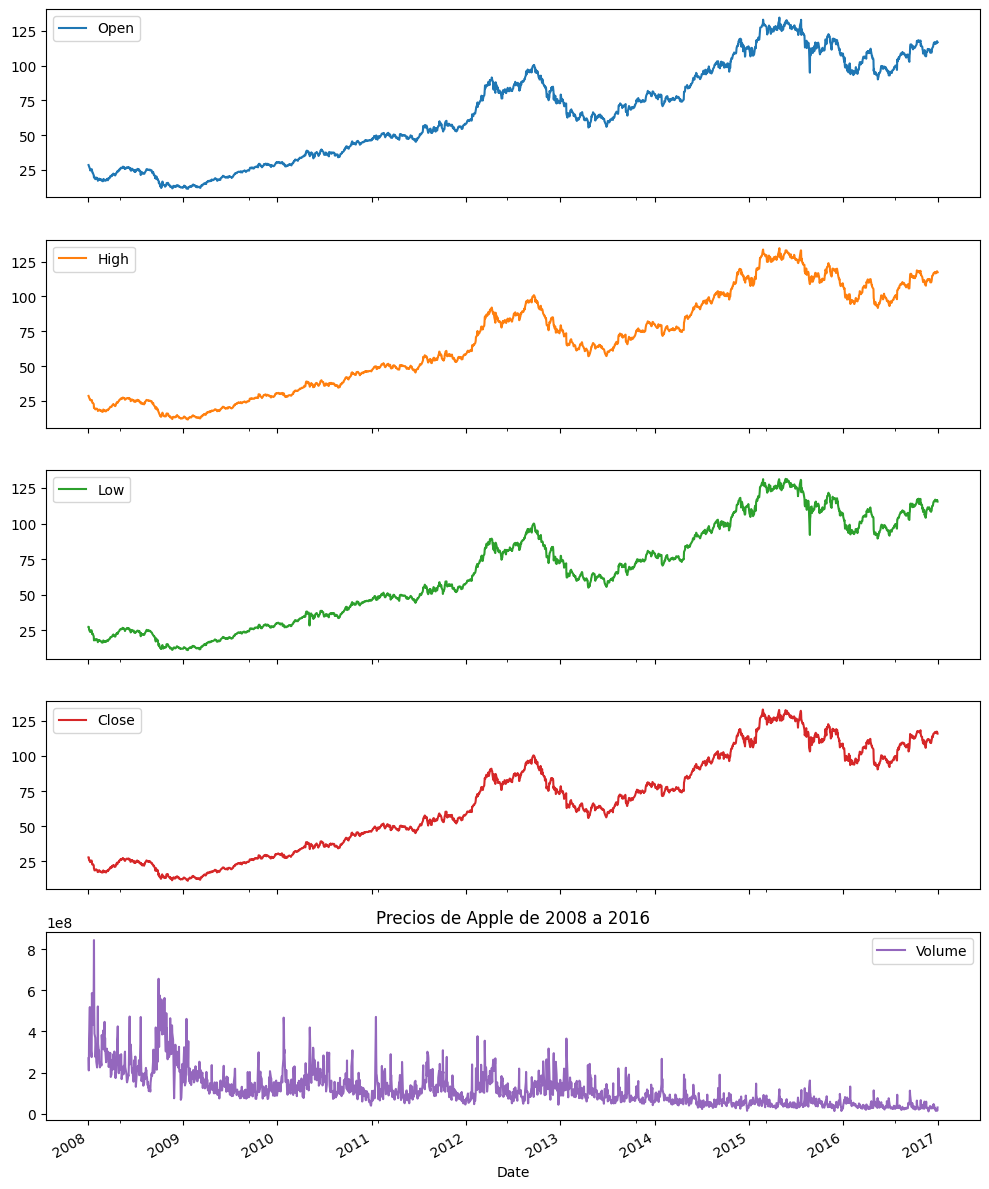

In [10]:
df_apple['2008':'2016'].plot(subplots=True, figsize=(10,12))
plt.title('Precios de Apple de 2008 a 2016')
plt.tight_layout()
plt.show()

In [11]:
df_apple['Name'].unique() #valor unico en el nombre

array(['AAPL'], dtype=object)

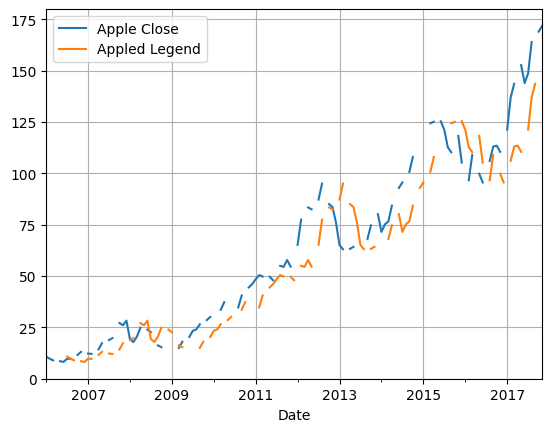

In [12]:
#Lag para ver cambios de tendencia entre periodos de tiempo
df_apple['Close'].asfreq('M').plot(legend=True)
lag=6 #meses de diferencia
shifted =df_apple['Close'].asfreq('M').shift(lag).plot(legend=True)
shifted.legend(['Apple Close', 'Appled Legend'])
plt.grid()
plt.show()

In [13]:
#grafico de cambio porcentual basado en close
df_apple['Change']=df_apple.Close.div(df_apple.Close.shift()) #agregamos columna de diferencia del close del dia entre el dia anterior
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_apple.head(20)

,Open,High,Low,Close,Volume,Name,Change
Date,,,,,,,
2006-01-03,10.3400,10.6800,10.3200,10.6800,201853036,AAPL,NaN
2006-01-04,10.7300,10.8500,10.6400,10.7100,155225609,AAPL,1.0028
2006-01-05,10.6900,10.7000,10.5400,10.6300,112396081,AAPL,0.9925
2006-01-06,10.7500,10.9600,10.6500,10.9000,176139334,AAPL,1.0254
2006-01-09,10.9600,11.0300,10.8200,10.8600,168861224,AAPL,0.9963
2006-01-10,10.8900,11.7000,10.8300,11.5500,570088246,AAPL,1.0635
2006-01-11,11.9800,12.1100,11.8000,11.9900,373548882,AAPL,1.0381
2006-01-12,12.1400,12.3400,11.9500,12.0400,320201966,AAPL,1.0042
2006-01-13,12.1400,12.2900,12.0900,12.2300,194153393,AAPL,1.0158


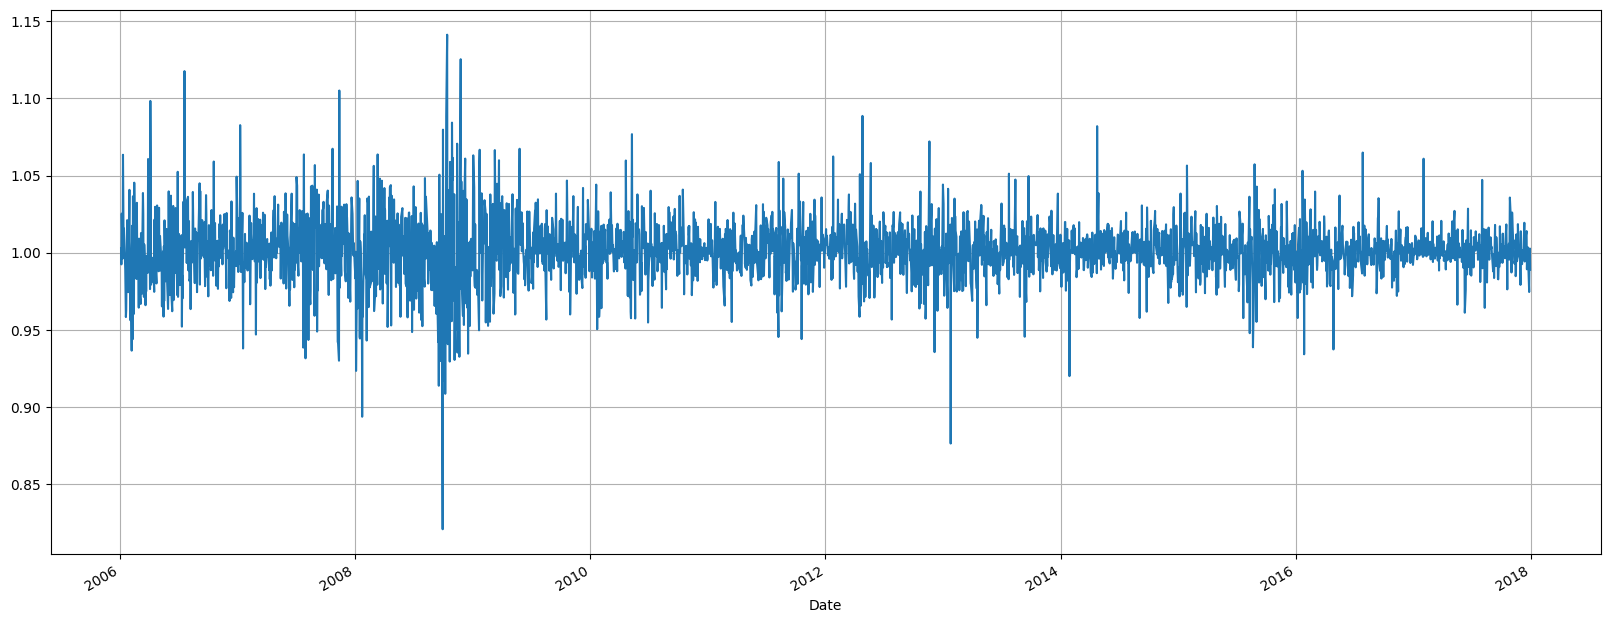

In [14]:
df_apple['Change'].plot(figsize=(20,8)).grid()
plt.show() #grafica de la nueva columna que tambien se puede agregar en los subplots anteriores

In [15]:
#calculo del retorno
df_apple['Return']=df_apple.Change.sub(1).mul(100)
df_apple.head(20)

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2006-01-03,10.3400,10.6800,10.3200,10.6800,201853036,AAPL,NaN,NaN
2006-01-04,10.7300,10.8500,10.6400,10.7100,155225609,AAPL,1.0028,0.2809
2006-01-05,10.6900,10.7000,10.5400,10.6300,112396081,AAPL,0.9925,-0.7470
2006-01-06,10.7500,10.9600,10.6500,10.9000,176139334,AAPL,1.0254,2.5400
2006-01-09,10.9600,11.0300,10.8200,10.8600,168861224,AAPL,0.9963,-0.3670
2006-01-10,10.8900,11.7000,10.8300,11.5500,570088246,AAPL,1.0635,6.3536
2006-01-11,11.9800,12.1100,11.8000,11.9900,373548882,AAPL,1.0381,3.8095
2006-01-12,12.1400,12.3400,11.9500,12.0400,320201966,AAPL,1.0042,0.4170
2006-01-13,12.1400,12.2900,12.0900,12.2300,194153393,AAPL,1.0158,1.5781


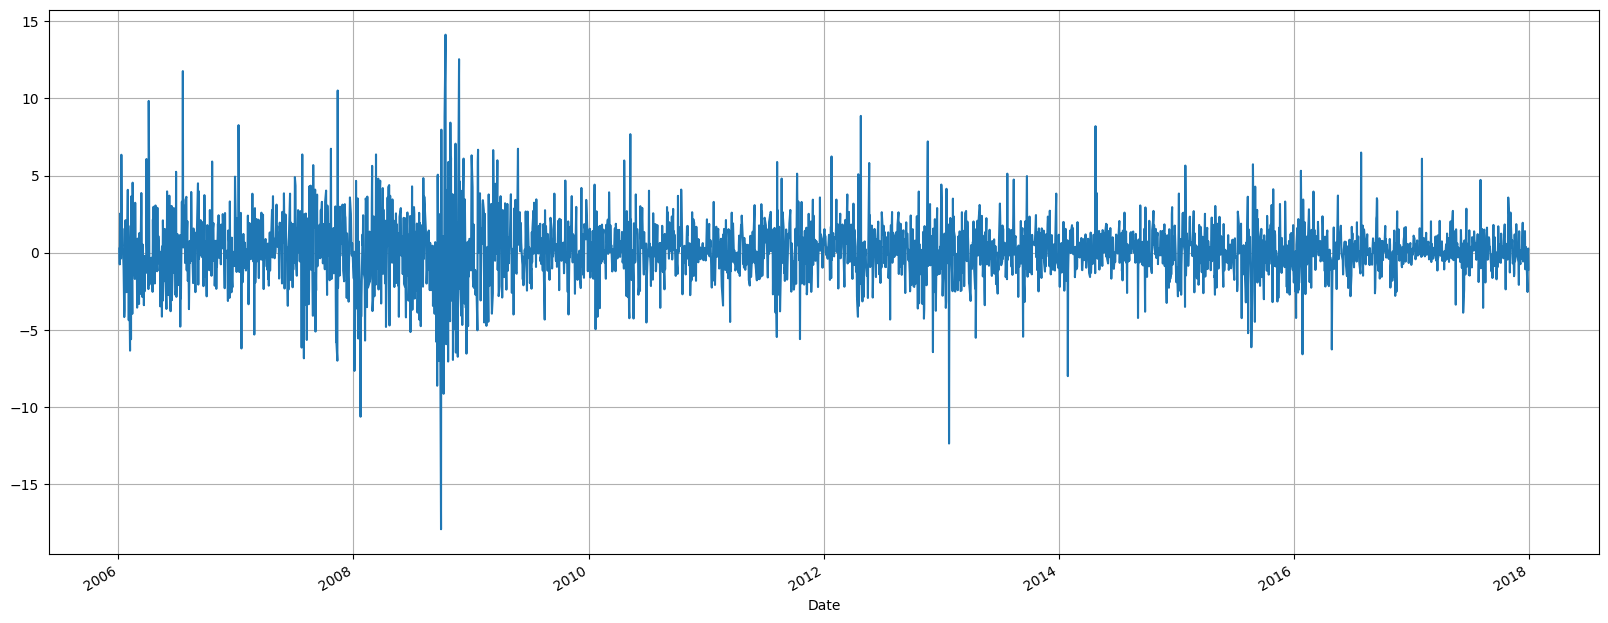

In [16]:
df_apple['Return'].plot(figsize=(20,8)).grid()
plt.show()

Comparacion de dos series (Apple con google)

In [17]:
df_google=pd.read_csv("/content/drive/MyDrive/GOOGL_2006-01-01_to_2018-01-01_M31.csv", sep=',', index_col='Date', parse_dates=['Date'])
df_google.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.4700,218.0500,209.3200,217.8300,13137450,GOOGL
2006-01-04,222.1700,224.7000,220.0900,222.8400,15292353,GOOGL
2006-01-05,223.2200,226.0000,220.9700,225.8500,10815661,GOOGL
2006-01-06,228.6600,235.4900,226.8500,233.0600,17759521,GOOGL
2006-01-09,233.4400,236.9400,230.7000,233.6800,12795837,GOOGL
2006-01-10,232.4400,235.3600,231.2500,235.1100,9104719,GOOGL
2006-01-11,235.8700,237.7900,234.8200,236.0500,9008664,GOOGL
2006-01-12,237.1000,237.7300,230.9800,232.0500,10125212,GOOGL
2006-01-13,232.3900,233.6800,231.0400,233.3600,7660220,GOOGL


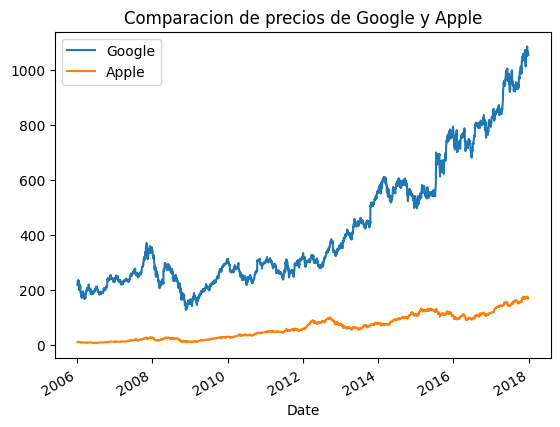

In [18]:
#Grafico comparativo de precios (de cierre)
df_google.Close.plot()
df_apple.Close.plot()
plt.legend(['Google', 'Apple'])
plt.title('Comparacion de precios de Google y Apple')
plt.show()

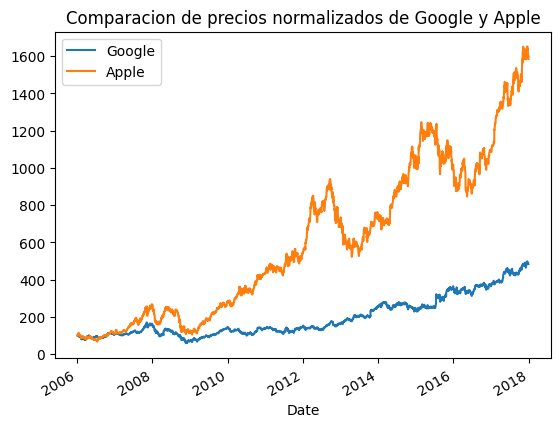

In [19]:
#Normalizacion de precios comparados con su primer precio
normal_google=df_google.Close.div(df_google.Close.iloc[0]).mul(100)
normal_apple=df_apple.Close.div(df_apple.Close.iloc[0]).mul(100)
normal_google.plot()
normal_apple.plot()
plt.legend(['Google', 'Apple'])
plt.title('Comparacion de precios normalizados de Google y Apple')
plt.show()

Vemos que el precio real de apple es mucho mayor que el de google, por ello es importante siempre normalizar los precios y hacer comparaciones con ellos

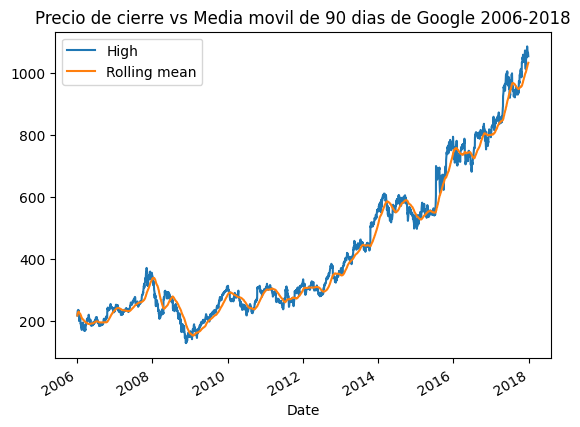

In [20]:
#Visulizacion de media movil de 90 dias (con funcion rolling)
rolling_google=df_google.Close.rolling('90D').mean()
df_google.Close.plot()
rolling_google.plot()
plt.title('Precio de cierre vs Media movil de 90 dias de Google 2006-2018')
plt.legend(['High', 'Rolling mean'])
plt.show()

##Graficos OHLC (open, high, low, close)
Se muestran high y low como largo de la barra mientras que openy close son las marcas horizontales
El color verde indica alza mientras que el rojo indica baja

In [21]:
%matplotlib inline
from pylab import rcParams

from chart_studio import plotly
from chart_studio import grid_objs
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
init_notebook_mode(connected=True) #inicializar ploty
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error

In [28]:
#Grafico OHLC
rango_ohlc= go.Ohlc(x=df_google.loc['2008-06'].index,
                    open=df_google.loc['2008-06'].Open,
                    high=df_google.loc['2008-06'].High,
                    low=df_google.loc['2008-06'].Low,
                    close=df_google.loc['2008-06'].Close)
fig = go.Figure(data=[rango_ohlc])

fig.update_layout(
    title='Gráfico OHLC de Google - Junio 2008',
    yaxis_title='Precio',
    showlegend=False)
iplot(fig)


In [27]:
#grafico del 2008 ohlc para google
df_2008 = df_google[df_google.index.year == 2008] #filtramos para el 2008
trace = go.Ohlc(
    x=df_2008.index,
    open=df_2008.Open,
    high=df_2008.High,
    low=df_2008.Low,
    close=df_2008.Close)

fig = go.Figure(data=[trace])
fig.update_layout(
    title='Gráfico OHLC de Google - 2008',
    yaxis_title='Precio',
    showlegend=False)
iplot(fig)

##Grafico de Velas (candlesticks)
El rectangulo muestra el rango entre el open y el close

In [29]:
trace=go.Candlestick(x=df_google.loc['2008-03'].index,
                     open=df_google.loc['2008-03'].Open,
                     high=df_google.loc['2008-03'].High,
                     low=df_google.loc['2008-03'].Low,
                     close=df_google.loc['2008-03'].Close)
fig = go.Figure(data=[trace])
fig.update_layout(
    title='Gráfico candlestick de Google - Marzo 2008',
    yaxis_title='Precio',
    showlegend=False)
iplot(fig)

Descomposicion de una serie de tiempo

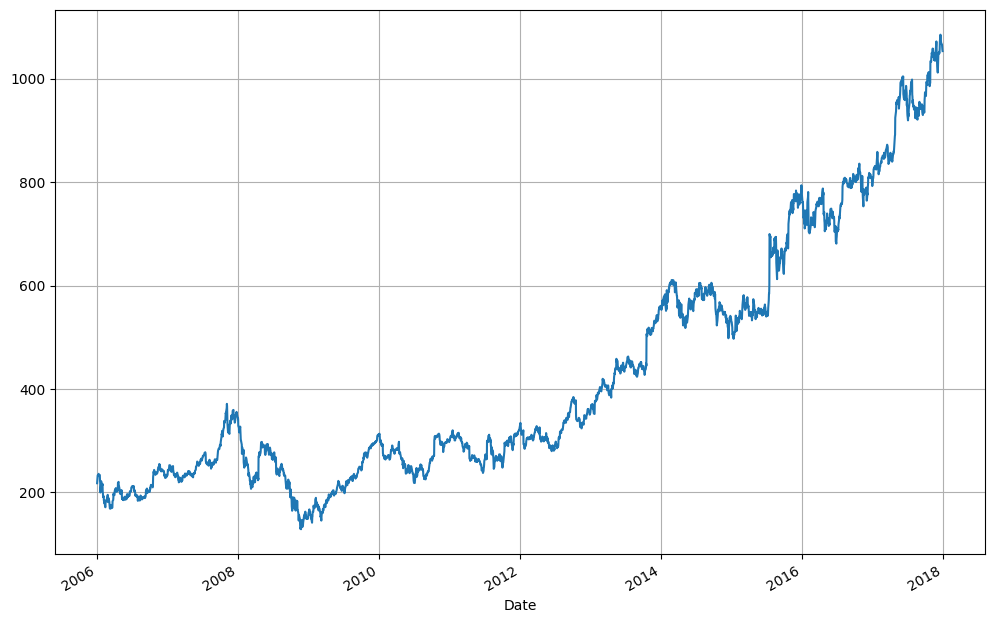

In [31]:
df_google['Close'].plot(figsize=(12,8)).grid()
plt.show()

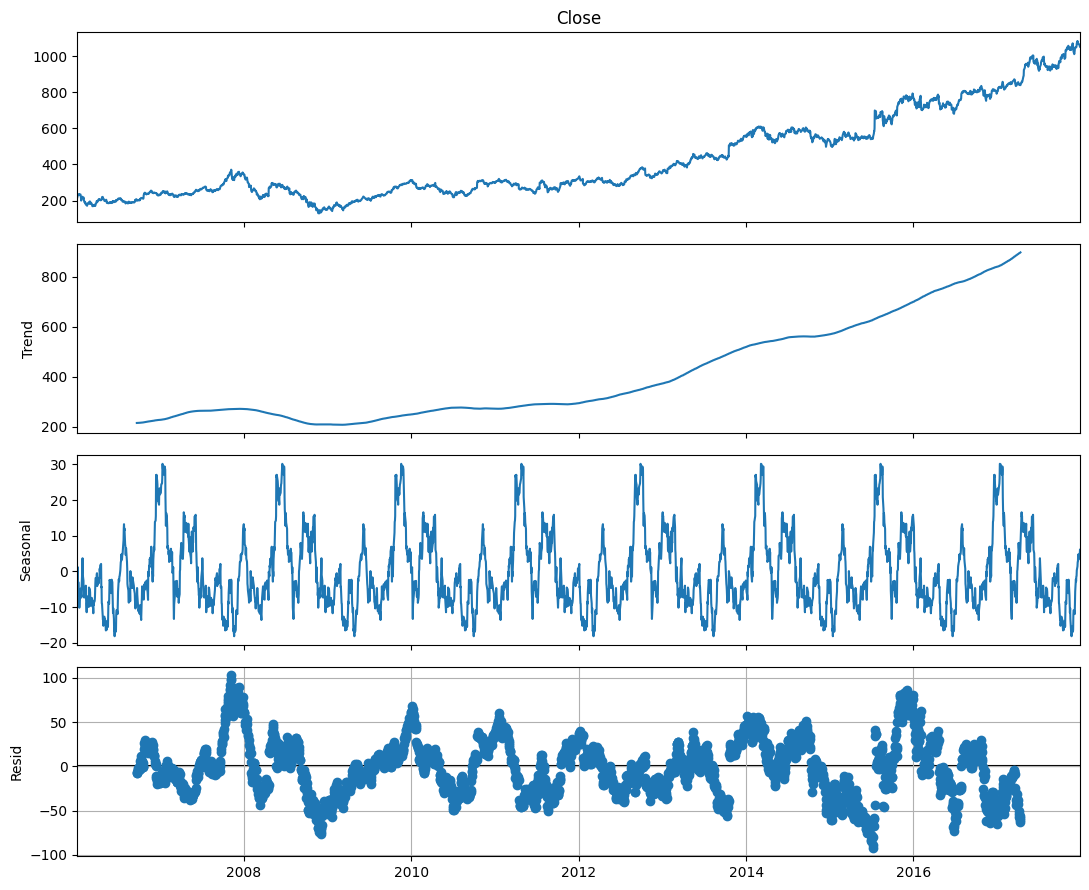

In [33]:
#para la descomposicion
rcParams['figure.figsize'] = 11, 9
decomposition_google = sm.tsa.seasonal_decompose(df_google['Close'], period=360)
fig = decomposition_google.plot()
plt.grid()
plt.show()

Vemos una tendencia creciente, estacionalidad claramente identificada y ruido que presenta outiliers

#Prediccion con Medias moviles
Asume que la tendencia y estacionalidad ya fueron incluidos

In [35]:
train_len=2500 #datos para train, lo demas para test (primeros 2500 dias)
train=df_google[0:train_len]
test=df_google[train_len:]

In [36]:
y_pred_sma= df_google.copy() #copia
ma_window=30 #ventana de 30 dias
y_pred_sma['sma_forecast']=df_google['High'].rolling(ma_window).mean() #media de 30 dias con la media del high
y_pred_sma['sma_forecast'][train_len]=y_pred_sma['sma_forecast'][train_len-1] #el ultimo del trainig es igual al anterior -1

In [37]:
y_pred_sma

,Open,High,Low,Close,Volume,Name,sma_forecast
Date,,,,,,,
2006-01-03,211.4700,218.0500,209.3200,217.8300,13137450,GOOGL,NaN
2006-01-04,222.1700,224.7000,220.0900,222.8400,15292353,GOOGL,NaN
2006-01-05,223.2200,226.0000,220.9700,225.8500,10815661,GOOGL,NaN
2006-01-06,228.6600,235.4900,226.8500,233.0600,17759521,GOOGL,NaN
2006-01-09,233.4400,236.9400,230.7000,233.6800,12795837,GOOGL,NaN
...,...,...,...,...,...,...,...
2017-12-22,1070.0000,1071.7200,1067.6400,1068.8600,889446,GOOGL,1056.9680
2017-12-26,1068.6400,1068.8600,1058.6400,1065.8500,918767,GOOGL,1057.7090
2017-12-27,1066.6000,1068.2700,1058.3800,1060.2000,1116203,GOOGL,1058.3600


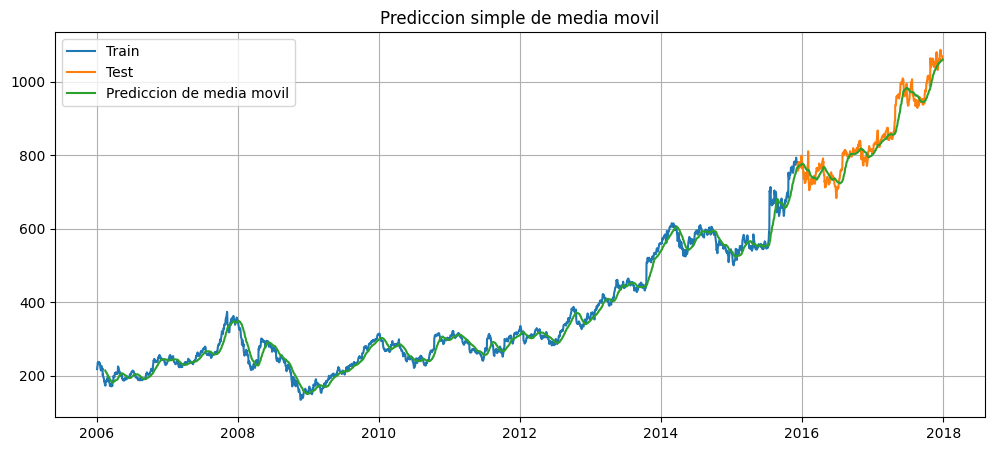

In [39]:
plt.figure(figsize=(12,5))
plt.plot(train['High'], label='Train')
plt.plot(test['High'], label='Test')
plt.plot(y_pred_sma['sma_forecast'], label='Prediccion de media movil')
plt.legend(loc='best')
plt.title('Prediccion simple de media movil')
plt.grid()
plt.show()

In [41]:
#Verificacion de que tan buena es la prediccion
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['High'], y_pred_sma['sma_forecast'][train_len:])).round(2)
mape=np.round(np.mean(np.abs(test['High']-y_pred_sma['sma_forecast'][train_len:])/test['High'])*100,2)

results=pd.DataFrame({'Method':['Simple moving average forecast'], 'MAPE':[mape], 'RMSE':[rmse]})
results= results[['Method','RMSE','MAPE']]
results #BUENA PREDICCION CON 2.42% DE DIFERENCIA

,Method,RMSE,MAPE
0,Simple moving average forecast,26.9300,2.4200


In [43]:
#Comparacion de la prediccion con la data real
y_comparison= pd.DataFrame().assign(forecast=y_pred_sma['sma_forecast'])
y_comparison['observed']= df_google['High']
y_comparison.tail(100)

,forecast,observed
Date,,
2017-08-09,963.4807,943.7600
2017-08-10,962.5827,936.3000
2017-08-11,961.9727,933.3600
2017-08-14,961.8407,941.0400
2017-08-15,962.1350,943.0700
...,...,...
2017-12-22,1056.9680,1071.7200
2017-12-26,1057.7090,1068.8600
2017-12-27,1058.3600,1068.2700
